In [47]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Add Methods notebook to this notebook
%run Methods.ipynb

In [49]:
# Read in data files

entGreedyDist = csv2list("Data/Centroid2/entDistGreedy2")
entDijkstraDist = csv2list("Data/Centroid2/entDistDijkstra2")
# entRandDist = csv2list("entDistNew")
# entRandBoundaryDist = csv2list("entDistBoundary")
# entRandBoundary5Dist = csv2list("entDistBoundary5")

In [51]:
# Random algorithm entropy values needs to be divided by 100

entRandDistList = []

for i in entRandDist:
    entRandDistList.append(i/100)

NameError: name 'entRandDist' is not defined

In [ ]:
# Random boundary 3 algorithm entropy values needs to be divided by 100

entRandBoundaryDistList = []

for i in entRandBoundaryDist:
    entRandBoundaryDistList.append(i/100)

In [ ]:
# Random boundary 5 algorithm entropy values needs to be divided by 100

entRandBoundaryDist5List = []

for i in entRandBoundary5Dist:
    entRandBoundaryDist5List.append(i/100)

In [52]:
# Pair entropy values to paths

greedy = getList(entGreedyDist)
dijkstra = getList(entDijkstraDist)
# rand = getList(entRandDistList)
# randBoundary = getList(entRandBoundaryDistList)
# randBoundary5 = getList(entRandBoundaryDist5List)

In [53]:
# Calculate average entropy values for each routing tables

greedy_avg = avgEntropy(greedy)
dijkstra_avg = avgEntropy(dijkstra)
# rand_avg = avgEntropy(rand)
# randBoundary_avg = avgEntropy(randBoundary)
# randBoundary5_avg = avgEntropy(randBoundary5)

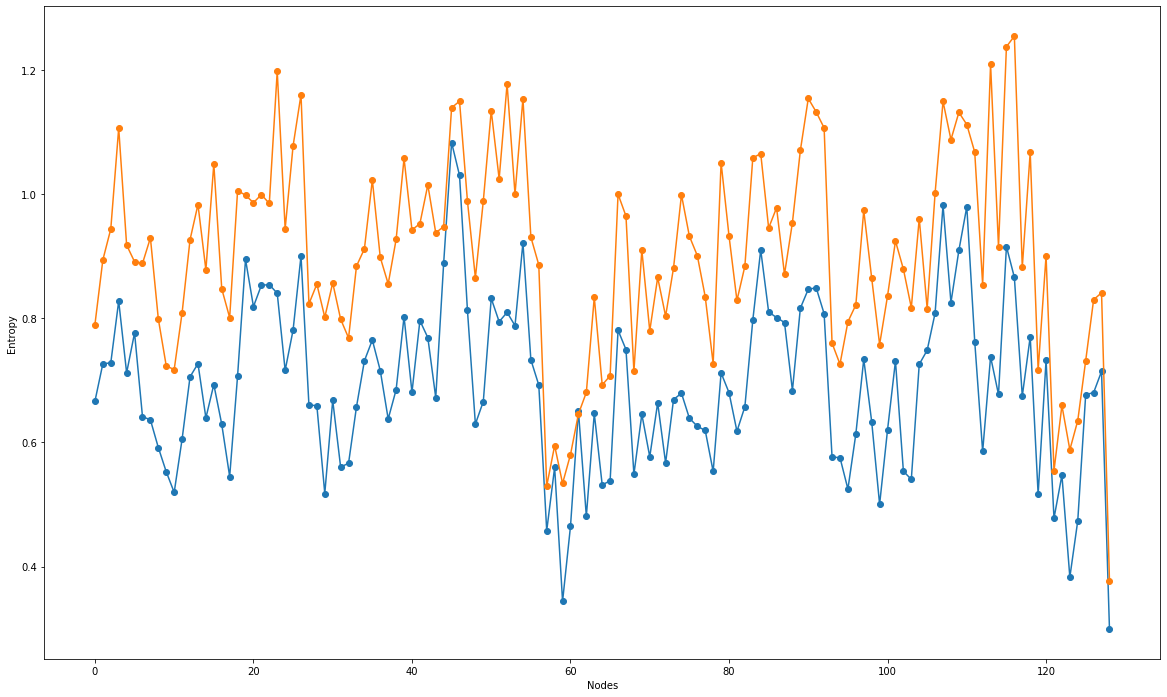

In [54]:
x_axes = [*range(0, len(positions[0]), 1)]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

# naming the x axis
plt.xlabel('Nodes')
# naming the y axis
plt.ylabel('Entropy')

# Blue
plt.plot(x_axes, greedy_avg, marker='o')
# Orange
plt.plot(x_axes, dijkstra_avg, marker='o')
plt.show()

In [55]:
diffGreedyShortest = []

for i in range(len(positions[0])):
     diffGreedyShortest.append(greedy_avg[i]-dijkstra_avg[i])

avgDiff = 0
for i in diffGreedyShortest:
    avgDiff += i
    
avgDiff = avgDiff/len(positions[0])

# Shortest algorithm average entropy is greater with 0.162..
avgDiff

-0.21291641349078264

In [56]:
# Calculate the difference between shortest path algorith entropy and greedy algortihm entropy for the same starting and endpont

sum = []
for i in range(len(entGreedyDist)):
    sum.append(entDijkstraDist[i]-entGreedyDist[i])
diff = getList(sum)
diff = sorted(diff, key=lambda x: x[0])

diff

[[-0.9162907318741552, [44, 65]],
 [-0.9162907318741552, [44, 67]],
 [-0.9162907318741552, [44, 109]],
 [-0.9162907318741552, [45, 65]],
 [-0.9162907318741552, [47, 108]],
 [-0.9162907318741552, [77, 113]],
 [-0.9162907318741552, [98, 113]],
 [-0.9162907318741552, [125, 30]],
 [-0.6931471805599453, [2, 51]],
 [-0.6931471805599453, [4, 39]],
 [-0.6931471805599453, [10, 51]],
 [-0.6931471805599453, [11, 30]],
 [-0.6931471805599453, [12, 48]],
 [-0.6931471805599453, [19, 57]],
 [-0.6931471805599453, [21, 30]],
 [-0.6931471805599453, [27, 1]],
 [-0.6931471805599453, [27, 3]],
 [-0.6931471805599453, [28, 1]],
 [-0.6931471805599453, [28, 20]],
 [-0.6931471805599453, [35, 20]],
 [-0.6931471805599453, [39, 64]],
 [-0.6931471805599453, [39, 65]],
 [-0.6931471805599453, [42, 65]],
 [-0.6931471805599453, [42, 67]],
 [-0.6931471805599453, [44, 30]],
 [-0.6931471805599453, [44, 68]],
 [-0.6931471805599453, [44, 108]],
 [-0.6931471805599453, [47, 71]],
 [-0.6931471805599453, [47, 126]],
 [-0.6931471